1 Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2 Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3 Разделите данные на выборку для обучения и тестирования
4 Постройте модель LDA
5 Визуализируйте предсказания для тестовой выборки и центры классов
6 Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7 Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [7]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [33]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [38]:
lda.predict(X_test)

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1,
       1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2])

In [39]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,1,1
2,1,1
3,1,1
4,1,1
5,2,2
6,1,1
7,1,1
8,2,1
9,0,0


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

In [42]:
lda.means_

array([[4.9972973 , 3.43513514],
       [5.94594595, 2.76486486],
       [6.67105263, 2.98947368]])

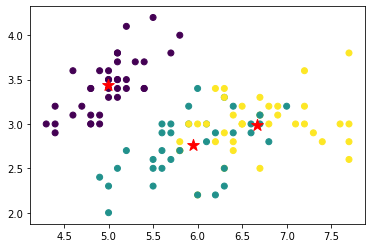

In [43]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')



In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_scaled = scaler.fit_transform(data)

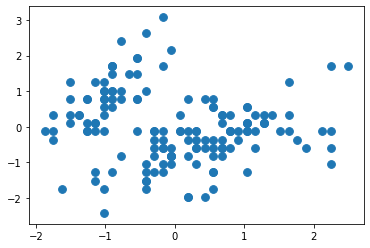

In [46]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [47]:
from sklearn.cluster import KMeans

In [80]:
k_inertia = []

ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    
    k_inertia.append(clf_kmeans.inertia_)

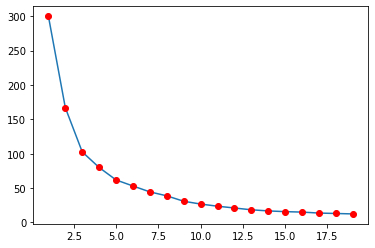

In [81]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [82]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

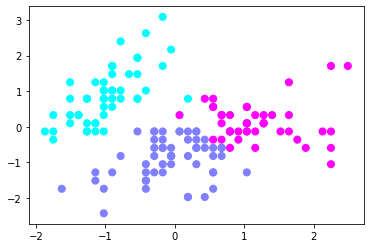

In [83]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap = 'cool', c=clusters, s=50)
